### Partial derivative formula for x:
### $$\frac{\partial f}{\partial x} = \frac{2x \ln(3)\cdot 3^{-x^2 - y^2}} {\left(3^ {-x^2 - y^2} + 1\right)^2} $$
### Partial derivative formula for y:
### $$\frac{\partial f}{\partial y} = \frac{2y \ln(3)\cdot 3^{-x^2 - y^2}} {\left(3^ {-x^2 - y^2} + 1\right)^2} $$

In [1]:
from math import log
import numpy as np

### Partial derivative function for x:

In [2]:
def fpx(x, y):
    r = 3**(-x**2 - y**2)
    numerator = 2*x*log(3) * r
    denominator = (r + 1)**2
    return numerator / denominator

### Partial derivative function for y:

In [3]:
def fpy(x, y):
    r = 3**(-x**2 - y**2)
    numerator = 2*y*log(3) * r
    denominator = (r + 1)**2
    return numerator / denominator

### Cost function:

In [4]:
def f(x, y):
    r = 3**(-x**2 -y**2)
    return 1 / (r + 1)

### Graphing 3D Gradient Descent & Advanced Numpy Arrays:

#### Declare variables:

In [5]:
multiplier = 0.1 # learning rate
max_iter = 200
initial_x = 1.8
initial_y = 1.0
params = np.array([initial_x, initial_y]) # initial guess
#print(params)
values_array = params.reshape(1, 2)

print(params.shape)
print(values_array.shape)
#print(values_array)

(2,)
(1, 2)


In [6]:
for nbr in range(max_iter):
    
    # Calculate cost: how far away we are from
    # the minimum based on the steepness of slope.
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    
    # LEARNING STEP: UPDATE PARAMETERS
    # Multiply each element in the gradients array
    # by the multipier (learning rate) and subtract
    # the result from the respective values currently
    # in the params array.
    params = params - multiplier * gradients
    
    # Append params array into values_array
    # Reshape params from a 1D array to a 2D array (1 row, 2 cols)
    # Append new values as a row (axis=0)
    # values_array = np.append(arr=values_array, values=params.reshape(1, 2), axis=0)
    
    # Equivalent functionality using Numpy concatenate:
    # values_array and params are passed in as a tuple
    values_array = np.concatenate( (values_array, params.reshape(1, 2)), axis=0)
    
# Gradient Descent Algorithm Results:
print('Gradient array values.....:', gradients)
print('Minimum for \'x\' occurs at.:', params[0])
print('Minimum for \'y\' occurs at.:', params[1])
print('Cost......................:', f(params[0], params[1]))
    

Gradient array values.....: [0.00046144 0.00025636]
Minimum for 'x' occurs at.: 0.0007938985101347202
Minimum for 'y' occurs at.: 0.0004410547278526219
Cost......................: 0.5000002265349848


### Create (x, y) data:

In [7]:
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

### Reshape data from a 1D array to a 2D array:

In [8]:
x_4, y_4 = np.meshgrid(x_4, y_4)

### Generate a 3D Plot:

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
#import color map
from matplotlib import cm
%matplotlib inline

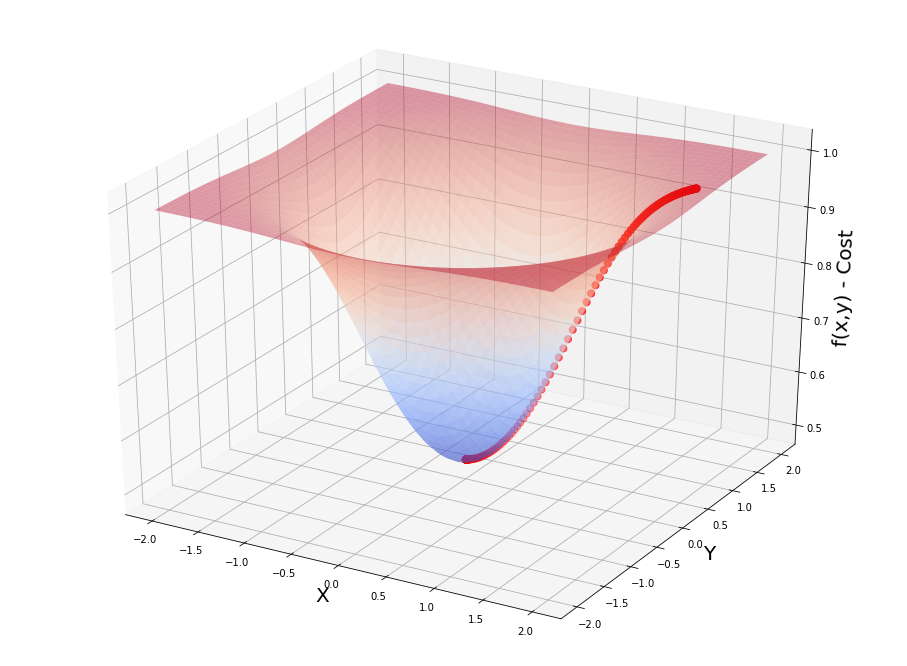

In [10]:
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x,y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)
#ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.hsv, alpha=0.4)

ax.scatter(values_array[:, 0], values_array[:, 1],
           f(values_array[:, 0], values_array[:, 1]),
          s=50, color='red') 

plt.show()